In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
len(df.columnsumns)

9

There are 9 columns in the dataset

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


As per data, following are the observations :-

1) No feature has Minimum Value = 0, except Height

2) All features are not Normally Distributed, ( Theortically if feature is normally distributed, Mean = Median = Mode ).

3) But features are close to Normality

4) All columns are numerical, except Sex

5) Each feature has different Scale

In [9]:
df.shape

(4177, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


As per data, no null value is present in the dataset in any of the 9 columns, 1 - Object Type, 7 - Float Type and 1 - Int Type

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

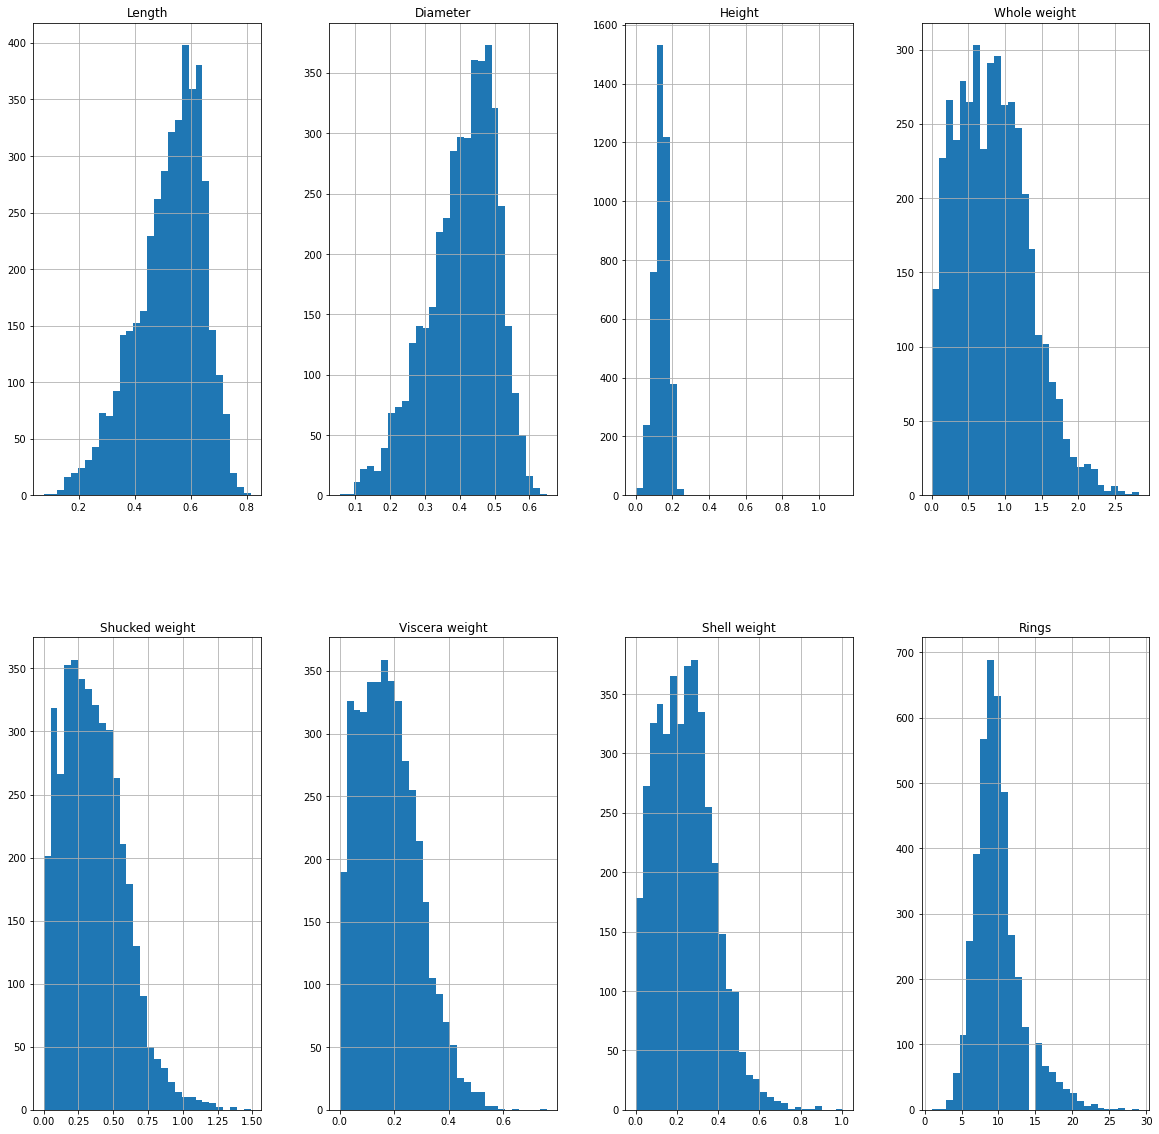

In [6]:
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

In [8]:
import numpy as np

nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

Bifurcating Numerical Features and Categorical Features

In [9]:
from scipy.stats import skew

skew_list = skew(df[nf],nan_policy='omit')
skew_list

array([-0.63964346, -0.60897935,  3.12769368,  0.53076787,  0.71883966,
        0.59163959,  0.62070382,  1.11370177])

Sending all numerical features and omitting nan values

In [10]:
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)
skew_list_df

,Features,Skewness
0,Length,-0.639643
1,Diameter,-0.608979
2,Height,3.127694
3,Whole weight,0.530768
4,Shucked weight,0.718840
5,Viscera weight,0.591640
6,Shell weight,0.620704
7,Rings,1.113702


According to the rules :-
1) For a normally Distributed Data, Skewness should be greater than 0.

2) Skewness > 0 , More weight is on the right tail of the distribution

In [11]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [12]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [13]:
df['Rings'].nunique()

28

# Visualization of the Data

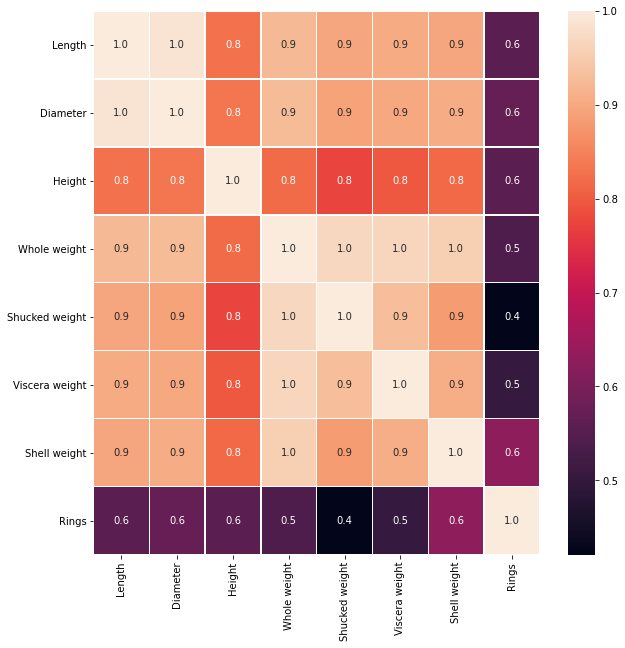

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

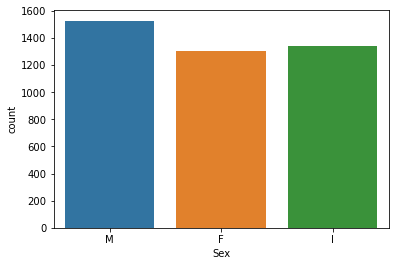

In [15]:
import seaborn as sns
sns.countplot(x='Sex', data = df)

In [16]:
df['Sex'].value_counts(normalize = True)

M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

In [17]:
df['Age'] = df['Rings'] + 1.5

Calculating Age from Rings, Age = Rings + 1.5

<AxesSubplot:xlabel='Sex', ylabel='Age'>

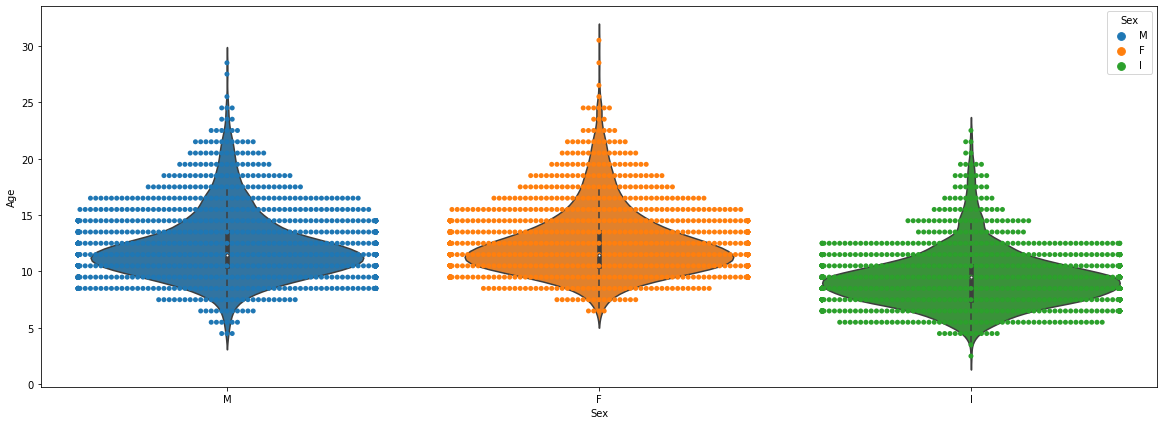

In [18]:
'''Sex and Age Visulization'''
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = df)

Sex and Age Visualization, as per graph :-

Male : Majority are between of Age 7.5 to 19
    
Female : Majority are between of Age 8 to 19

Infant : Majority are between of Age 6 to < 10

In [20]:
from sklearn.preprocessing import LabelEncoder

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [21]:
x = df.drop( ['Rings','Sex'], axis = 1 )
y = df['Rings']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.25, random_state = 25)

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Using KNN

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
knn_grid = [{'n_neighbors': [i+1 for i in range(10)] }, ]

knn_search = GridSearchCV (knn, knn_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1)
knn_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
knn_search.best_params_

{'n_neighbors': 4}

In [26]:
result = knn_search.cv_results_
result

{'mean_fit_time': array([0.00708728, 0.01196241, 0.01416922, 0.01942143, 0.00526505,
        0.00398083, 0.01175804, 0.02118392, 0.01997252, 0.00855865]),
 'std_fit_time': array([0.00251545, 0.01106193, 0.0150124 , 0.01336754, 0.00192138,
        0.00383851, 0.00535592, 0.02289886, 0.01608331, 0.00224705]),
 'mean_score_time': array([0.00747433, 0.01742358, 0.02330651, 0.01519775, 0.01489511,
        0.02684336, 0.019519  , 0.02033601, 0.02540255, 0.03660979]),
 'std_score_time': array([0.00568769, 0.01332056, 0.01597756, 0.01210602, 0.01348527,
        0.01715894, 0.01286406, 0.01901533, 0.01845385, 0.0204629 ]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},


In [27]:
for mts, param in zip(result['mean_test_score'], result['params']):
    print (mts, param)

-0.24743772006257295 {'n_neighbors': 1}
-0.19604078450555668 {'n_neighbors': 2}
-0.17219711265448617 {'n_neighbors': 3}
-0.1666664437378663 {'n_neighbors': 4}
-0.17250201018083983 {'n_neighbors': 5}
-0.17396517158582064 {'n_neighbors': 6}
-0.1799353576672273 {'n_neighbors': 7}
-0.1867743906400477 {'n_neighbors': 8}
-0.19241203520485323 {'n_neighbors': 9}
-0.20014564511773186 {'n_neighbors': 10}


In [28]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma}

# Trying with SVR

In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, n_iter=20, verbose=1)
svm_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [31]:
svm_search.best_params_

{'kernel': 'linear', 'gamma': 0.1, 'C': 1}

In [32]:
result = svm_search.cv_results_
result

{'mean_fit_time': array([3.10105648e+00, 2.21643066e+00, 2.34191942e+00, 2.82355776e+00,
        1.31875224e+00, 2.93245602e-01, 2.70290337e+00, 3.25979967e+00,
        2.95369864e-01, 2.97165489e-01, 5.23178339e-01, 9.01792364e+00,
        2.51164513e+00, 6.66820431e-01, 9.19471827e+00, 1.58039274e+00,
        2.51985693e+00, 3.28324296e+03, 6.15951872e-01, 1.02793207e+00]),
 'std_fit_time': array([6.33764842e-02, 3.20482632e-02, 6.23623516e-02, 4.64524103e-02,
        3.00365536e-02, 2.29866514e-02, 4.21244678e-02, 6.15852093e-02,
        2.50690218e-02, 2.52641703e-02, 4.43480701e-02, 5.64834305e-01,
        1.10442308e-01, 4.03120501e-02, 3.78616317e-01, 5.82336644e-02,
        5.99449537e-02, 1.15867955e+03, 4.88169809e-02, 6.71126248e-02]),
 'mean_score_time': array([0.63392763, 0.38111963, 1.28580036, 0.50960002, 0.47212915,
        0.00832691, 0.52350292, 0.63731093, 0.00140491, 0.00160851,
        0.22218094, 0.35856748, 0.48893533, 0.10680375, 0.36727214,
        0.8084434 , 

In [33]:
for mts, params in zip(result['mean_test_score'], result['params']):
    print(mts, params)

-46440.50601801531 {'kernel': 'sigmoid', 'gamma': 1, 'C': 1}
-11.076512713611127 {'kernel': 'poly', 'gamma': 0.01, 'C': 0.01}
-7.760143306218009 {'kernel': 'rbf', 'gamma': 1, 'C': 0.01}
-70.67616693602221 {'kernel': 'sigmoid', 'gamma': 0.1, 'C': 0.1}
-1.0300105414189022 {'kernel': 'rbf', 'gamma': 1, 'C': 1}
-0.0020375009436257815 {'kernel': 'linear', 'gamma': 0.1, 'C': 1}
-700550.3651796274 {'kernel': 'sigmoid', 'gamma': 0.1, 'C': 10}
-446.7904610947195 {'kernel': 'sigmoid', 'gamma': 1, 'C': 0.1}
-0.0020375009436257815 {'kernel': 'linear', 'gamma': 1, 'C': 10}
-0.0020375009436257815 {'kernel': 'linear', 'gamma': 0.01, 'C': 10}
-0.027672782661199817 {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}
-4.754685098476843 {'kernel': 'poly', 'gamma': 0.1, 'C': 10}
-3.943268794300925 {'kernel': 'sigmoid', 'gamma': 0.1, 'C': 0.01}
-0.034271419228473585 {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
-4.754143009209673 {'kernel': 'poly', 'gamma': 1, 'C': 0.01}
-3.1761299625103416 {'kernel': 'rbf', 'gamma': 1, '

# Trying with RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

ensemble = RandomForestRegressor()
ensemble_grid =  {'n_estimators': [(i+1)*10 for i in range(20)], 'criterion': ['mse', 'mae'], 'bootstrap': [True, False]}


ensemble_search = RandomizedSearchCV(ensemble, ensemble_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, n_iter=10, verbose=1)
ensemble_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [36]:
ensemble_search.best_params_

{'n_estimators': 70, 'criterion': 'mse', 'bootstrap': False}

In [37]:
result = ensemble_search.cv_results_
result

{'mean_fit_time': array([ 7.14485712,  0.48988891,  0.43004913,  0.95325041,  0.29261656,
         0.61415672,  0.56911387, 20.20421686, 17.33869963,  0.10627127]),
 'std_fit_time': array([0.09744892, 0.00665782, 0.00498289, 0.01179008, 0.004991  ,
        0.00793811, 0.00626441, 1.22164588, 4.1867758 , 0.00801111]),
 'mean_score_time': array([0.00538621, 0.01017313, 0.00877657, 0.02333779, 0.00817838,
        0.01156921, 0.01417799, 0.01042113, 0.01362538, 0.00520735]),
 'std_score_time': array([0.00048893, 0.00074647, 0.00039895, 0.00101714, 0.0003988 ,
        0.00048858, 0.00360482, 0.00080324, 0.00446531, 0.00431423]),
 'param_n_estimators': masked_array(data=[40, 80, 70, 200, 60, 100, 120, 110, 100, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_criterion': masked_array(data=['mae', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mae',
                    'm

In [38]:
for mts, params in zip(result['mean_test_score'], result['params']):
    print(mts, params)

-0.0025929778701764567 {'n_estimators': 40, 'criterion': 'mae', 'bootstrap': False}
-0.0025615101165089595 {'n_estimators': 80, 'criterion': 'mse', 'bootstrap': False}
-0.0025215974461692586 {'n_estimators': 70, 'criterion': 'mse', 'bootstrap': False}
-0.004882458726324958 {'n_estimators': 200, 'criterion': 'mse', 'bootstrap': True}
-0.0048054747350190444 {'n_estimators': 60, 'criterion': 'mse', 'bootstrap': True}
-0.0025681854359977776 {'n_estimators': 100, 'criterion': 'mse', 'bootstrap': False}
-0.004268764483294918 {'n_estimators': 120, 'criterion': 'mse', 'bootstrap': True}
-0.002556303655830189 {'n_estimators': 110, 'criterion': 'mae', 'bootstrap': False}
-0.002584092717998889 {'n_estimators': 100, 'criterion': 'mae', 'bootstrap': False}
-0.005022115810874849 {'n_estimators': 20, 'criterion': 'mse', 'bootstrap': True}


In [40]:
svm_reg = svm_search.best_estimator_
svm_reg.fit(x_train, y_train)

SVR(C=1, gamma=0.1, kernel='linear')

In [54]:
from sklearn.metrics import mean_squared_error

svm_pred = svm_reg.predict(x_test)
print('SVR RMSE value : ' , np.sqrt(mean_squared_error(svm_pred, y_test)))

SVR RMSE value :  0.16996505260630465


In [45]:
knn_reg = knn_search.best_estimator_
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [52]:
knn_pred = knn_reg.predict(x_test)
print('KNN RMSE value : ' , np.sqrt(mean_squared_error(knn_pred, y_test)))

KNN RMSE value :  0.41495661847392074


In [49]:
ensemble_reg = ensemble_search.best_estimator_
ensemble_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, n_estimators=70)

In [55]:
ensemble_pred = ensemble_reg.predict(x_test)
print('RandomForestRegressor RMSE value : ' , np.sqrt(mean_squared_error(ensemble_pred, y_test)))

RandomForestRegressor RMSE value :  0.1773768656987401


In [61]:
import pickle
filename = 'abalone_case_Study.pkl'
pickle.dump(svm_reg, open(filename, 'wb' ))

Saving the model with SVM as the error value is least as compared to other models.

In [64]:
filename = 'abalone_case_Study.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9969636048688963


Trying to Load the model just to check if saved model is working or not